## Flows of Knowledge - Research, Teaching and Jobs

We will be using the created vectors to analyse the relationship between research, teaching and jobs in cities and in universities.

### load vectors

because of the super long process of generating these vectors, we will use random vectors for the time being. 

In [1]:
import csv
import json
import operator

In [2]:
import numpy as np

In [3]:
def read_vectors(file_name):
    line = open(file_name, "r")
    for l in line:
        d = eval(l)
    return d

In [4]:
job_cities = read_vectors("../saved_data_structures/jobs_vectors_cities.txt")

In [5]:
job_orgs = read_vectors("../saved_data_structures/jobs_vectors_orgs.txt")

In [6]:
research_cities = read_vectors("../saved_data_structures/research_vectors_cities.txt")

In [7]:
research_orgs = read_vectors("../saved_data_structures/research_vectors_orgs.txt")

In [8]:
teaching_cities = read_vectors("../saved_data_structures/teaching_vectors_cities.txt")

In [9]:
teaching_orgs = read_vectors("../saved_data_structures/teaching_vectors_orgs.txt")

In [10]:
len(research_orgs), len(teaching_orgs), len(job_orgs), len(research_cities), len(teaching_cities), len(job_cities)

(69016, 2069, 448, 7559, 1265, 264)

In [11]:
def count_entities(vectors, min_papers=100, kind=""):
    count = 0
    for vec in vectors:
        if vectors[vec][2] > min_papers and kind in vec.lower():
            print(vec.lower(), vectors[vec][2])
            count += 1
    return count
    

In [12]:
job_orgs['Intuit'][2]

2

In [13]:
count_entities(teaching_orgs, kind="community")

lansing community college 67586
houston community college 25022
windward community college 3122
mclennan community college 15241
laredo community college 2753
oakton community college 326
lassen community college 192
clark state community college 23527
lewis and clark community college 4874
alvin community college 4752
collin county community college district 11018
linn-benton community college 151
mercer county community college 640
northeast texas community college 799
pima community college 268
brookdale community college 299
southern maine community college 2807
cerro coso community college 2663
el paso community college 4563
seward county community college and area technical school 2621
pellissippi state community college 1892
kansas city kansas community college 381
virginia western community college 305
portland community college 1150
meridian community college 116
northwestern connecticut community college 169
mount wachusett community college 109
cuny borough of manhattan comm

85

### matching names

We now have research, jobs, and teaching vectors. We want to match the strings of the names so we can easily analyse within each of the domains.

In [14]:
import re
from fuzzywuzzy import fuzz

/home/bhargav/.local/lib/python3.6/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [15]:
import string

In [16]:
def convertabrv(entity, city=False):
    """
    converts uni/city into non abbreviated form.
    """
    stop_words = ['of', 'the', 'at', 'and']
    replace = {'univ':'university', 'res':'research', 'med':'medical', 'coll':'college', 'ctr':'center', 'jr':'junior',
               'inst':'institute', 'nat':'natural', 'htlh':'health', 'calif':'california', 'sci':'science', 'adv':'advanced',
               'ut':'university texas', 'n':'north', 's':'south', 'e': 'east', 'w': 'west', 'natl':'national',
               'uc':'university california', 'pk':'park', 'ft':'fort', 'so':'southern', 'no':'northern', 'syst':'system',
               'technol':'technology', 'penn':'pennsylvania', 'hosp':'hospital', 'clin':'clinic', 'mt':'mount',
               'biomed':'biomedical', 'canc':'cancer', 'nw':'northwestern', 'cuny':'city university new york',
                'suny':'state university new york', 'unc':'university north carolina', 'mit':'massachusetts institute technology',
               'caltech':'california institute technology', 'gen':'general', 'nyu':'new york university',
               'iit':'illionis institute technology', 'inc':'incorporated', 'fdn':'foundation'}
    stop_chars = ['-']
    remove_chars = ['&']
    entity_ = entity.lower()
    
    for chars in stop_chars:
        entity_ = entity_.replace(chars, " ")
    
    for chars in remove_chars:
        entity_ = entity_.replace(chars, "")
    
    for word in replace:
        entity_ = re.sub(r'\b%s\b' % word, replace[word], entity_)
    
    for word in stop_words:
        entity_ = re.sub(r'\b%s\b' % word, " ", entity_)
    
    entity_ = entity_.strip()
    entity_ = re.sub(' +', ' ', entity_)
    
    if city:
        return(string.capwords(entity_))
    
    return entity_

In [17]:
# for teach_org in list(teaching_orgs.keys()):
#    teach_entity = convertabrv(teach_org)
#    ks = {}
#    for research_org in list(research_orgs.keys()):
#        research_entity = convertabrv(research_org)
#        sim = fuzz.token_sort_ratio(teach_entity, research_entity)
#        ks[research_org] = sim
#    sorted_ = sorted(ks.items(), key=operator.itemgetter(1))[-1]
#    teaching_to_research[teach_org] = sorted_

#### Sanity check

Especially with the research to teaching matching, there seems to be a lot of universities missing. While conducting the matching, we will run some experiments to see if some universities are missing.

missing from teaching - NYU, UPenn, Uminnesota, MD Anderson, Penn State, Boston University, uni virgnia, northeastern (boston), UT Houston, Dallas health center, montana - missoula, Ohio University



In [18]:
research_orgs['Georgia Tech'][0] = (np.array(research_orgs['Georgia Tech'][0]) + np.array(research_orgs['Georgia Inst Technol'][0])) / 2.0

In [19]:
research_orgs['Georgia Tech'][2] = (research_orgs['Georgia Tech'][2] + research_orgs['Georgia Inst Technol'][2]) 

In [20]:
del research_orgs['Georgia Inst Technol']

In [21]:
def entity_name_check(vectors, entity, papers=100, paper_check=True):
    names = []
    for vector in vectors:
        if paper_check:  
            if entity in vector and vectors[vector][2] > papers:
                names.append(vector)
        else:
            if entity in vector:
                names.append((vector, vectors[vector]))
    return names

In [22]:
# entity_name_check(teaching_orgs, "Texas A & M")

In [23]:
# entity_name_check(research_orgs, "Texas", papers=5000)

In [24]:
# entity_name_check(teaching_to_research_match, "Texas A & M", paper_check=False)

In [25]:
import json

In [26]:
with open("../saved_data_structures/teaching_to_research_matching.txt") as file:
    teaching_to_research = json.load(file)

In [27]:
teaching_to_research

{'Angelo State University': ['Angelo State Univ', 100],
 'University of Mississippi': ['Univ Mississippi', 100],
 'Tufts University': ['Tufts Univ', 100],
 'Foothill College': ['Foothill Coll', 100],
 'University of Georgia': ['Univ Georgia', 100],
 'Kean University': ['Kean Univ', 100],
 'Jackson College': ['Jackson Coll', 100],
 'The University of Alabama': ['Univ Alabama', 100],
 'Lansing Community College': ['Lansing Community Coll', 100],
 'New Mexico Junior College': ['NE Jr Coll', 81],
 'University of West Georgia': ['West Georgia Univ', 100],
 'Park University': ['Park Univ', 100],
 'Stephen F Austin State University': ['Stephen F Austin State Univ', 100],
 'Excelsior College': ['Excelsior Coll', 100],
 'Galveston College': ['Galveston Coll', 100],
 'North Seattle College': ['North Seattle Comm Coll', 89],
 'Houston Community College': ['Houston Community Coll', 100],
 'Texas A & M University-Commerce': ['Texas A& M Univ Commerce', 100],
 'University of Maryland-College Park': 

In [28]:
teaching_to_research_match = {}

In [29]:
for teach_org in teaching_to_research:
    if teaching_to_research[teach_org][1] > 90:
        teaching_to_research_match[teach_org] = teaching_to_research[teach_org][0]

In [30]:
teaching_to_research_match['University of California-Berkeley'] = 'Univ Calif Berkeley'

In [31]:
teaching_to_research_match['University of Washington-Seattle Campus'] = 'Univ Washington'

In [32]:
teaching_to_research_match['Georgia Institute of Technology-Main Campus'] = 'Georgia Tech'

In [33]:
teaching_to_research_match['University of Pittsburgh-Pittsburgh Campus'] = 'Univ Pittsburgh'

In [34]:
teaching_to_research_match['Ohio State University-Main Campus'] = 'Ohio State Univ'

In [35]:
teaching_to_research_match['Texas A & M University-College Station'] = 'Texas A&M Univ'

In [36]:
len(teaching_to_research_match)

1583

In [37]:
research_to_teaching_match = dict((v, k) for k, v in teaching_to_research_match.items())

### angles

Our vectors come with three different kinds of information - the mean, the variance, and the number of articles used to create these metrics. One basic tool of analysis we can use is to create angles of difference to measure similarities. This section will contain methods to generate these angles, as well as functions to find most and least similar institutions. 

In [38]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

In [39]:
def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    if v1 is None or v2 is None:
        return (None, None)
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    cos = np.clip(np.dot(v1_u, v2_u), -1.0, 1.0)
    return np.arccos(cos)*57.2958 , cos

In [40]:
def find_similar(name, dictionary, n=5, reverse=False):
    angles = {}
    for entity in dictionary:
        if entity != name:
            angles[entity] = round(angle_between(dictionary[entity][0], dictionary[name][0])[0], 3)
    
    sorted_n = sorted(angles.items(), key=operator.itemgetter(1))
    if not reverse:
        return(sorted_n[0:n])
    if reverse:
        sorted_n.reverse()
        return(sorted_n[0:n])

In [41]:
for org in list(job_orgs.keys()):
    if "oil" in org.lower():
        print(org)

Amalie Oil Company


In [42]:
list(job_orgs.keys())[0:10]

["Dave & Buster's",
 'Oriana House Incorporated',
 'Intuit',
 'Collective Health',
 "Macy's",
 'Araz Group Incorporated',
 'Audubon Nature Institute',
 'Marriott International Incorporated',
 'Grant Thornton',
 'Telecare Corporation']

In [43]:
find_similar("Chicago", research_cities, n=10)

[('New Haven', 2.479),
 ('New York', 2.506),
 ('Philadelphia', 2.737),
 ('Los Angeles', 2.913),
 ('Pittsburgh', 2.943),
 ('Nashville', 3.128),
 ('St Louis', 3.129),
 ('Ann Arbor', 3.161),
 ('Salt Lake City', 3.265),
 ('Iowa City', 3.283)]

In [44]:
find_similar("Chicago", research_cities, n=10, reverse=True)

[('Griffia', 93.613),
 ('Etta', 93.239),
 ('Frankft', 92.225),
 ('Maysville', 91.6),
 ('Placer Hall', 91.362),
 ('Twilliamsburg', 90.619),
 ('Tupper Hall Davis', 90.329),
 ('Houstony', 90.316),
 ('Merrimac', 90.281),
 ('Urbana Champion', 90.033)]

## visualisation tools

We will use the angles and vectors to create visualisations to better understand how the cities or institutions relate.

In [45]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [46]:
def create_heatmap(matrix, names_0, names_1, kind, title="HEATMAP", figsize=(7, 7)):
    angles = np.zeros((len(names_0), len(names_1)))
    for i, name_0 in enumerate(names_0):
        for j, name_1 in enumerate(names_1):
            if name_0 is not name_1:
                angles[i][j] = np.around(eval(matrix[repr((name_0, name_1))])[kind], decimals=1)

    fig, ax = plt.subplots(figsize=figsize)
    im = ax.imshow(angles)
    
    ax.set_xticks(np.arange(len(names_0)))
    ax.set_yticks(np.arange(len(names_1)))
    
    ax.set_xticklabels(names_0)
    ax.set_yticklabels(names_1)
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    for i in range(len(names_0)):
        for j in range(len(names_1)):
            text = ax.text(j, i, angles[i, j], ha="center", va="center", color="w")
    
    ax.set_title(title)
    fig.tight_layout()
    plt.show()
    

In [47]:
names_0 = []
names_1 = []

In [48]:
with open('../saved_data_structures/org_angles_between.txt', 'r') as file:
    org_angles_between = (json.load(file))

In [49]:
names = list(org_angles_between.keys())

In [50]:
names_0, names_1 = [], []
for name_ in random.sample(names, 7):
    name_0, name_1 = eval(name_)
    names_0.append(name_0)
    names_1.append(name_1)

In [51]:
names_1.append('Harvard University')

In [52]:
names_1.append('University of Chicago')

In [53]:
names_1.append('Rice University')

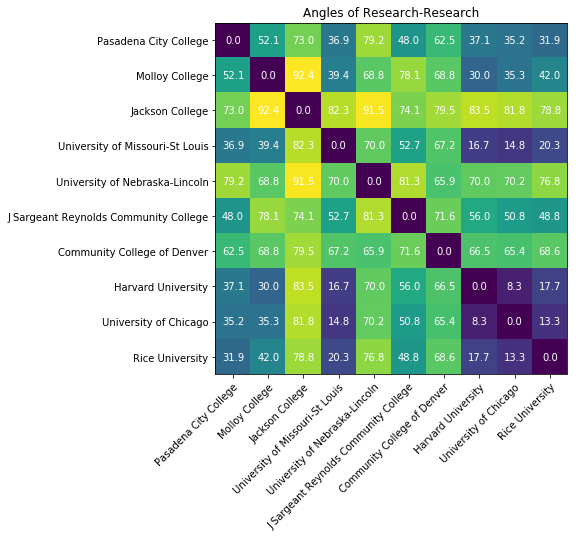

In [54]:
create_heatmap(org_angles_between, names_1, names_1, 0, "Angles of Research-Research", figsize=(8, 8))

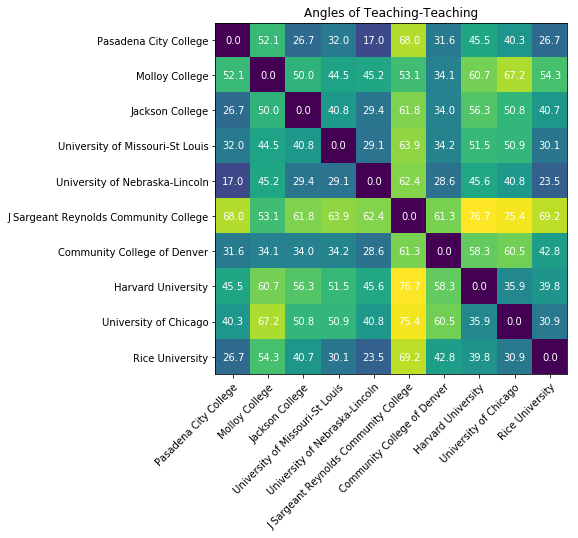

In [55]:
create_heatmap(org_angles_between, names_1, names_1, 3, "Angles of Teaching-Teaching", figsize=(8, 8))

### tier information

We will load tiers so that we can use them to cluster and do tier analysis.

In [56]:
with open('../saved_data_structures/tiers.txt') as json_file:
    tiers = json.load(json_file)

In [57]:
tiers['1'].append('Harvard University')

In [58]:
with open('../saved_data_structures/tiers_research.txt') as json_file:
    tiers_research = json.load(json_file)

### clustering

We will use the vectors to then cluster and visualise these clusters. 

In [59]:
from scipy.cluster.vq import kmeans, vq

In [60]:
no_clusters = 7

In [61]:
def create_clusters_scipy(vector_dict, no_clusters, min_docs=100):
    names, vectors = [], []
    for name in vector_dict:
        vector = vector_dict[name]
        if vector[2] > min_docs:
            names.append(name)
            vectors.append(np.array(vector[0]))
    vectors = np.array(vectors)
    centroids, _ = kmeans(vectors, no_clusters)
    doc_clusters, _ = vq(vectors, centroids)
    doc_labels = list(zip(names, doc_clusters))
    return doc_labels

In [62]:
def in_cluster(entity_labels, label_no):
    entities = []
    for item_ in entity_labels:
        entity, label = item_
        if label == label_no:
            entities.append(entity)
    return entities
    

In [63]:
clustered_research_orgs = create_clusters_scipy(research_orgs, no_clusters, min_docs=2500)

In [64]:
for i in range(0, 7):
    clust = in_cluster(clustered_research_orgs, i)
    print(len(clust), clust[0:20])

47 ['Johns Hopkins Univ', 'Univ Chicago', 'Univ Washington', 'Univ Texas', 'Univ Calif Los Angeles', 'Indiana Univ', 'Georgetown Univ', 'Harvard Univ', 'San Diego State Univ', 'George Washington Univ', 'Boston Univ', 'Duke Univ', 'Univ Minnesota', 'Tulane Univ', 'Univ N Carolina', 'Univ Cincinnati', 'E Carolina Univ', 'Univ Michigan', 'Univ Pittsburgh', 'Northwestern Univ']
35 ['Brigham & Womens Hosp', 'Med Univ S Carolina', 'Mem Sloan Kettering Canc Ctr', 'Thomas Jefferson Univ', 'Johns Hopkins Univ Hosp', 'Childrens Hosp', 'Rush Univ', 'Mt Sinai Sch Med', 'Mayo Clin', 'Ctr Dis Control & Prevent', 'Oregon Hlth & Sci Univ', 'Univ Calif San Francisco', 'Loyola Univ', 'Massachusetts Gen Hosp', 'Montefiore Med Ctr', 'Univ Alabama Birmingham', 'Cleveland Clin Fdn', 'Johns Hopkins Bloomberg Sch Publ Hlth', 'Childrens Hosp Philadelphia', 'Columbia Univ Coll Phys & Surg']
20 ['US EPA', 'Oregon State Univ', 'USDA ARS', 'USDA', 'Univ New Hampshire', 'Smithsonian Inst', 'Montana State Univ', 'Un

In [65]:
clustered_research_cities = create_clusters_scipy(research_cities, no_clusters, min_docs=2500)

In [66]:
for i in range(0, 15):
    clust = in_cluster(clustered_research_cities, i)
    print(len(clust), clust[0:20])

36 ['Washington', 'New Brunswick', 'Cincinnati', 'Los Angeles', 'San Antonio', 'Toledo', 'Columbus', 'Gainesville', 'Minneapolis', 'New Orleans', 'Atlanta', 'Columbia', 'Pittsburgh', 'Buffalo', 'Ann Arbor', 'Memphis', 'Lexington', 'New Haven', 'Salt Lake City', 'Brooklyn']
19 ['Oklahoma City', 'Charleston', 'Aurora', 'Birmingham', 'Hershey', 'Winston Salem', 'Galveston', 'Loma Linda', 'Jackson', 'Bethesda', 'Oakland', 'Torrance', 'Little Rock', 'Omaha', 'Farmington', 'Augusta', 'Shreveport', 'Duarte', 'Valhalla']
41 ['Madison', 'Ithaca', 'Normal', 'Stony Brook', 'E Lansing', 'Kent', 'Tucson', 'Stanford', 'Irvine', 'Tallahassee', 'Storrs', 'Bloomington', 'Greensboro', 'Newark', 'Medford', 'Morgantown', 'Norfolk', 'Knoxville', 'Albuquerque', 'Tuscaloosa']
55 ['Berkeley', 'University Pk', 'Argonne', 'Notre Dame', 'Ames', 'College Stn', 'W Lafayette', 'Dayton', 'Evanston', 'Urbana', 'Orlando', 'Santa Barbara', 'Austin', 'Clemson', 'San Jose', 'Gaithersburg', 'Cambridge', 'Riverside', 'Blac

In [67]:
clustered_teaching_orgs = create_clusters_scipy(teaching_orgs, no_clusters, min_docs=1500)

In [68]:
for i in range(0, 10):
    clust = in_cluster(clustered_teaching_orgs, i)
    print(len(clust), clust[0:20])

13 ['Foothill College', 'Galveston College', 'Tyler Junior College', 'Lewis and Clark Community College', 'Casper College', 'Santa Rosa Junior College', 'University of Michigan-Ann Arbor', 'Central Lakes College-Brainerd', 'El Paso Community College', 'Seward County Community College and Area Technical School', 'Santa Barbara City College', 'Gavilan College', 'Minnesota State College-Southeast Technical']
1 ['Sierra College']
46 ['Angelo State University', 'Jackson College', 'New Mexico Junior College', 'University of West Georgia', 'Excelsior College', 'Western Kentucky University', 'Brigham Young University-Provo', 'Windward Community College', 'San Jose State University', 'Wayne State University', 'Valencia College', 'Northwest College', 'Woodbury University', 'University of North Texas', 'Texas State University', 'The University of Texas at Austin', 'University of Akron Main Campus', 'Amarillo College', 'University of South Florida-Main Campus', 'University of Florida']
11 ['Park U

In [69]:
from sklearn.cluster import KMeans

In [70]:
def sklearn_cluster(vector_dict, no_clusters, min_docs=1500):
    return it

## Visualising clusters

In [71]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [72]:
import matplotlib.pyplot as plt

In [73]:
import matplotlib._color_data as mcd
from random import sample

In [74]:
colors_20 = sample(list(mcd.CSS4_COLORS), 20)

In [75]:
uni_labels = {}

In [76]:
for tier in tiers:
    for uni in tiers[tier]:
        if uni in teaching_orgs:
            uni_labels[uni] = colors_20[int(tier) - 1]

In [77]:
def plotpca(vector_dict, dims= (0, 1), n_components=10, min_docs=100, annotate=True):
    PCA_n = PCA(n_components=n_components)
    names, vectors = [], []
    for name in vector_dict:
        vector = vector_dict[name]
        if vector[2] > min_docs:
            if name in research_to_teaching_match:
                names.append(research_to_teaching_match[name])
            else:
                names.append(name)
            vectors.append(np.array(vector[0]))
    vectors = np.array(vectors)
    pca_vecs = PCA_n.fit_transform(vectors)
    fig = plt.figure(figsize= (8, 8))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')
    ax.set_title('PCA plot')
    dim_1, dim_2 = dims
    for vec, name in zip(pca_vecs, names):
        if name in uni_labels:
            ax.scatter(vec[dim_1], vec[dim_2], c=uni_labels[name])
            if annotate:
                ax.annotate(name, (vec[dim_1], vec[dim_2]))
    plt.show()

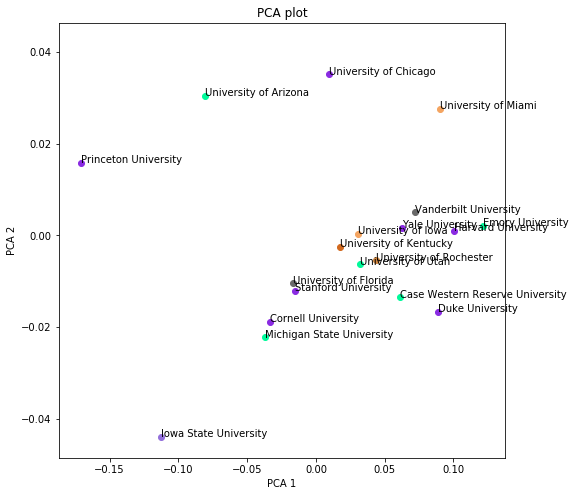

In [78]:
plotpca(research_orgs, min_docs=20000)

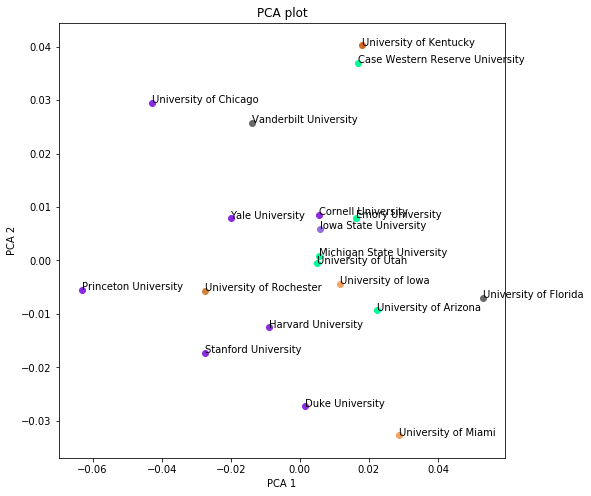

In [79]:
plotpca(research_orgs, min_docs=20000, dims=(2, 3))

### t-sne

In [80]:
def plottsne(vector_dict, dims= (0, 1), n_components=2, min_docs=500, perplexity=400, n_iter=300, annotate=True):
    tsne = TSNE(n_components=n_components, perplexity=perplexity, n_iter=n_iter)    
    names, vectors = [], []
    for name in vector_dict:
        vector = vector_dict[name]
        if vector[2] > min_docs:
            if name in research_to_teaching_match:
                names.append(research_to_teaching_match[name])
            else:
                names.append(name)
            vectors.append(np.array(vector[0]))
    vectors = np.array(vectors)
    tsne_vecs = tsne.fit_transform(vectors)
    fig = plt.figure(figsize= (8, 8))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('tsne 1')
    ax.set_ylabel('tsne 2')
    ax.set_title('tsne plot')
    dim_1, dim_2 = dims
    for vec, name in zip(tsne_vecs, names):
        if name in uni_labels:
            ax.scatter(vec[dim_1], vec[dim_2], c=uni_labels[name])
            if annotate:
                ax.annotate(name, (vec[dim_1], vec[dim_2]))

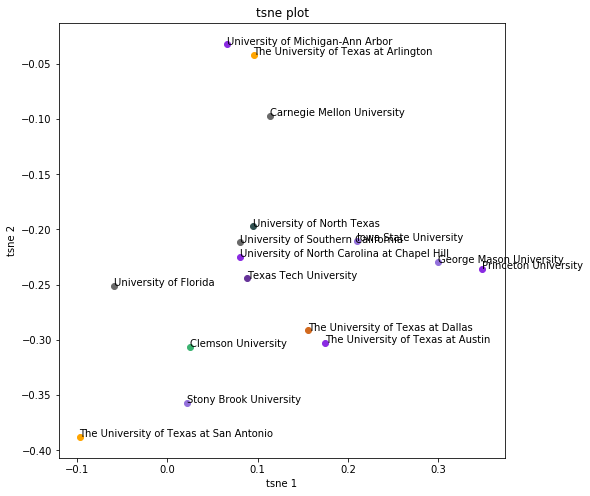

In [81]:
plottsne(teaching_orgs, min_docs=3000)

### tier-analysis

Access to tiers means we can create more fine tuned analysis within tiers to find patterns. Similarities to other universities within the tier and outside the tier.

In [82]:
def clean_uni_name(uni_name):
    # matching for peculiarities in the tiers
    # to fix - Uni Houston, Purdue, University of Pittsburgh, 
    # to fix - UMass-Amherst, UMass-Boston, Uni South Florida, Tulane, oklahoma-norman, uni of alaska
    uni_name = uni_name.replace(" - ", "-").replace(" : ", "-").replace(", ", "-").replace(" (MIT)", "").replace(".", "")
    uni_name = uni_name.replace("Columbia University", "Columbia University in the City of New York").replace("The ", "")
    uni_name = uni_name.replace("University of Colorado at Boulder", "University of Colorado Boulder")
    uni_name = uni_name.replace("University of Colorado at Denver", "University of Colorado Denver")
    uni_name = uni_name.replace("University of Texas at Austin", "The University of Texas at Austin")
    uni_name = uni_name.replace("University of Texas at Dallas", "The University of Texas at Dallas")
    uni_name = uni_name.replace("Indiana University Bloomington", "Indiana University-Bloomington")
    uni_name = uni_name.replace("University of Washington", "University of Washington-Seattle Campus")
    uni_name = uni_name.replace("Georgia Institute of Technology", "Georgia Institute of Technology-Main Campus")
    uni_name = uni_name.replace("The Ohio State University - Columbus", "Ohio State University-Main Campus")
    uni_name = uni_name.replace("Texas A&M University", "Texas A & M University-College Station")
    return(uni_name)

In [83]:
within_tier_angles_rr = {}
within_tier_angles_tt = {}
within_tier_angles_rt = {}
within_tier_angles_rt_self = {}

In [84]:
missing_unis_teaching = []

In [85]:
missing_unis_research = []

In [86]:
def get_entity_vector(entity):
    # get teaching name
    try:
        teaching_uni_1_vector = teaching_orgs[entity][0]
    except KeyError:
        teaching_uni_1_vector = None
    # get research name
    try:
        research_uni_1 = teaching_to_research_match[entity]
        research_vector_1 = research_orgs[research_uni_1][0]
    except KeyError:
        if entity == "New York University":
            research_uni_1 = "NYU"
            research_vector_1 = research_orgs[research_uni_1][0]
        if entity == "University of Pennsylvania":
            research_uni_1 = "UPenn"
            research_vector_1 = research_orgs[research_uni_1][0]
        else:
            research_vector_1 = None
    return teaching_uni_1_vector, research_vector_1

In [87]:
unis_per_tier_research = {}
unis_per_tier_teaching = {}

In [88]:
american_unis = []

In [89]:
for tier in tiers:
    for uni in tiers[tier]:
        uni_name = clean_uni_name(uni)
        if uni_name in teaching_orgs:
            american_unis.append(uni_name)

In [90]:
len(american_unis)

147

In [91]:
america_tiers = {}

In [92]:
i = 0

In [93]:
for num in range(0, 7):
    america_tiers[num] = american_unis[i:i+21]
    i += 21

In [94]:
america_tiers[0].remove('University of California-San Francisco')

In [95]:
america_tiers[0].append('Harvard University')

In [96]:
america_tiers[1].remove('Harvard University')

In [97]:
america_tiers[1].append('University of California-San Francisco')

In [98]:
america_tiers

{0: ['Stanford University',
  'Massachusetts Institute of Technology',
  'University of California-Berkeley',
  'Princeton University',
  'Columbia University in the City of New York',
  'California Institute of Technology',
  'University of Chicago',
  'University of California-Los Angeles',
  'Yale University',
  'Cornell University',
  'University of Washington-Seattle Campus',
  'Johns Hopkins University',
  'University of California-San Diego',
  'University of Michigan-Ann Arbor',
  'Washington University in St Louis',
  'University of Wisconsin-Madison',
  'Duke University',
  'Northwestern University',
  'University of North Carolina at Chapel Hill',
  'Rockefeller University',
  'Harvard University'],
 1: ['University of Colorado Boulder',
  'University of Illinois at Urbana-Champaign',
  'The University of Texas at Austin',
  'University of Maryland-College Park',
  'University of California-Santa Barbara',
  'University of Southern California',
  'Vanderbilt University',
  '

In [99]:
for tier in tiers:
    
    within_tier_angles_rr[tier] = 0
    within_tier_angles_tt[tier] = 0
    within_tier_angles_rt[tier] = 0
    within_tier_angles_rt_self[tier] = 0

    no_checks_rr = 0
    no_checks_tt = 0
    no_checks_rt = 0
    no_checks_self = 0
    
    unis_per_tier_research[tier] = []
    unis_per_tier_teaching[tier] = []
    
    for uni_1 in tiers[tier]:
        
        
        teaching_vector_1, research_vector_1 = get_entity_vector(clean_uni_name(uni_1))
        
        if research_vector_1 is not None:
            unis_per_tier_research[tier].append(uni_1)
            
        if teaching_vector_1 is not None:
            unis_per_tier_teaching[tier].append(uni_1)
            
        if teaching_vector_1 is not None and research_vector_1 is not None:
            within_tier_angles_rt_self[tier] += angle_between(research_vector_1, teaching_vector_1)[0]
            no_checks_self += 1
            
        if teaching_vector_1 is None and uni_1 not in missing_unis_teaching:
            missing_unis_teaching.append(uni_1)
            
        if research_vector_1 is None and uni_1 not in missing_unis_research:
            missing_unis_research.append(uni_1)
            
        for uni_2 in tiers[tier]:
            
            teaching_vector_2, research_vector_2 = get_entity_vector(clean_uni_name(uni_2))
            
            if research_vector_1 is not None and research_vector_2 is not None:
                within_tier_angles_rr[tier] += angle_between(research_vector_1, research_vector_2)[0]
                no_checks_rr += 1
            
            if teaching_vector_1 is not None and teaching_vector_2 is not None:
                within_tier_angles_tt[tier] += angle_between(teaching_vector_1, teaching_vector_2)[0]
                no_checks_tt += 1                
            
            if research_vector_1 is not None and research_vector_2 is not None and teaching_vector_1 is not None and teaching_vector_2 is not None:
                within_tier_angles_rt[tier] += angle_between(research_vector_1, teaching_vector_2)[0] + angle_between(teaching_vector_1, research_vector_2)[0]
                no_checks_rt += 2

    within_tier_angles_rt_self[tier] = round(within_tier_angles_rt_self[tier] / no_checks_self, 3)
    within_tier_angles_rr[tier] = round(within_tier_angles_rr[tier] / no_checks_rr, 3)
    within_tier_angles_tt[tier] = round(within_tier_angles_tt[tier] / no_checks_tt, 3)
    within_tier_angles_rt[tier] = round(within_tier_angles_rt[tier] / no_checks_rt, 3)

In [100]:
# missing_unis_research

In [101]:
uni_tier_lens = {}
for tier in unis_per_tier_research:
    uni_tier_lens[tier] = len(unis_per_tier_research[tier])

In [102]:
uni_tier_lens

{'1': 28,
 '2': 9,
 '3': 9,
 '4': 5,
 '5': 7,
 '6': 12,
 '7': 7,
 '8': 9,
 '9': 5,
 '10': 9,
 '11': 6,
 '12': 4,
 '13': 6,
 '14': 7,
 '15': 3,
 '16': 4,
 '17': 3,
 '18': 5,
 '19': 3,
 '20': 5}

In [103]:
within_tier_angles_rr

{'1': 53.526,
 '2': 27.879,
 '3': 38.259,
 '4': 23.378,
 '5': 20.347,
 '6': 34.329,
 '7': 13.984,
 '8': 51.555,
 '9': 40.183,
 '10': 33.402,
 '11': 22.776,
 '12': 41.362,
 '13': 41.169,
 '14': 25.376,
 '15': 8.577,
 '16': 47.001,
 '17': 44.004,
 '18': 28.796,
 '19': 8.917,
 '20': 24.604}

In [104]:
np.corrcoef(np.array(list(within_tier_angles_rr.values())), np.array(list(uni_tier_lens.values())))

array([[1.       , 0.4383653],
       [0.4383653, 1.       ]])

In [105]:
within_tier_angles_tt

{'1': 36.967,
 '2': 35.541,
 '3': 37.887,
 '4': 30.042,
 '5': 26.852,
 '6': 32.947,
 '7': 26.083,
 '8': 29.368,
 '9': 33.057,
 '10': 37.516,
 '11': 19.924,
 '12': 26.388,
 '13': 37.306,
 '14': 35.725,
 '15': 26.63,
 '16': 41.557,
 '17': 23.951,
 '18': 28.541,
 '19': 30.137,
 '20': 36.775}

In [106]:
within_tier_angles_rt

{'1': 65.034,
 '2': 65.444,
 '3': 64.422,
 '4': 57.521,
 '5': 53.208,
 '6': 66.518,
 '7': 58.685,
 '8': 65.091,
 '9': 60.852,
 '10': 62.873,
 '11': 54.894,
 '12': 62.802,
 '13': 65.589,
 '14': 56.548,
 '15': 57.318,
 '16': 65.67,
 '17': 62.896,
 '18': 59.463,
 '19': 55.903,
 '20': 59.395}

In [107]:
between_tier_angles_rr = {}
between_tier_angles_tt = {}

In [108]:
for tier_1 in tiers:
    for tier_2 in tiers:
        if tier_1 == tier_2:
            continue
        between_tier_angles_rr[(tier_1, tier_2)] = 0
        between_tier_angles_tt[(tier_1, tier_2)] = 0
        no_checks_rr = 0
        no_checks_tt = 0
        for uni_1 in tiers[tier_1]:
            
            teaching_vector_1, research_vector_1 = get_entity_vector(clean_uni_name(uni_1))

            for uni_2 in tiers[tier_2]:
                
                teaching_vector_2, research_vector_2 = get_entity_vector(clean_uni_name(uni_2))
                
                if research_vector_1 is not None and research_vector_2 is not None:
                    between_tier_angles_rr[(tier_1, tier_2)] += angle_between(research_vector_1, research_vector_2)[0]
                    no_checks_rr += 1

                if teaching_vector_1 is not None and teaching_vector_2 is not None:
                    between_tier_angles_tt[(tier_1, tier_2)] += angle_between(teaching_vector_1, teaching_vector_2)[0]
                    no_checks_tt += 1                

        between_tier_angles_rr[(tier_1, tier_2)] = round(between_tier_angles_rr[(tier_1, tier_2)] / no_checks_rr, 3)
        between_tier_angles_tt[(tier_1, tier_2)] = round(between_tier_angles_tt[(tier_1, tier_2)] / no_checks_tt, 3)

In [109]:
between_tier_angles_tt

{('1', '2'): 38.627,
 ('1', '3'): 41.406,
 ('1', '4'): 37.849,
 ('1', '5'): 41.233,
 ('1', '6'): 39.557,
 ('1', '7'): 36.202,
 ('1', '8'): 39.245,
 ('1', '9'): 39.818,
 ('1', '10'): 43.99,
 ('1', '11'): 38.666,
 ('1', '12'): 40.494,
 ('1', '13'): 43.332,
 ('1', '14'): 44.297,
 ('1', '15'): 37.622,
 ('1', '16'): 49.543,
 ('1', '17'): 40.15,
 ('1', '18'): 40.619,
 ('1', '19'): 41.352,
 ('1', '20'): 41.924,
 ('2', '1'): 38.627,
 ('2', '3'): 41.869,
 ('2', '4'): 37.728,
 ('2', '5'): 40.037,
 ('2', '6'): 38.743,
 ('2', '7'): 35.251,
 ('2', '8'): 37.935,
 ('2', '9'): 40.279,
 ('2', '10'): 42.414,
 ('2', '11'): 37.664,
 ('2', '12'): 39.999,
 ('2', '13'): 42.492,
 ('2', '14'): 43.221,
 ('2', '15'): 37.016,
 ('2', '16'): 49.601,
 ('2', '17'): 41.893,
 ('2', '18'): 39.561,
 ('2', '19'): 40.271,
 ('2', '20'): 41.895,
 ('3', '1'): 41.406,
 ('3', '2'): 41.869,
 ('3', '4'): 38.762,
 ('3', '5'): 39.263,
 ('3', '6'): 39.155,
 ('3', '7'): 37.442,
 ('3', '8'): 38.574,
 ('3', '9'): 39.95,
 ('3', '10'): 4

In [110]:
between_tier_angles_rr

{('1', '2'): 45.145,
 ('1', '3'): 49.609,
 ('1', '4'): 43.776,
 ('1', '5'): 43.067,
 ('1', '6'): 48.692,
 ('1', '7'): 40.323,
 ('1', '8'): 56.625,
 ('1', '9'): 52.832,
 ('1', '10'): 48.262,
 ('1', '11'): 43.551,
 ('1', '12'): 54.141,
 ('1', '13'): 51.566,
 ('1', '14'): 44.979,
 ('1', '15'): 39.23,
 ('1', '16'): 57.435,
 ('1', '17'): 62.228,
 ('1', '18'): 46.432,
 ('1', '19'): 39.743,
 ('1', '20'): 46.858,
 ('2', '1'): 45.145,
 ('2', '3'): 35.694,
 ('2', '4'): 29.098,
 ('2', '5'): 27.119,
 ('2', '6'): 33.579,
 ('2', '7'): 23.219,
 ('2', '8'): 45.265,
 ('2', '9'): 40.325,
 ('2', '10'): 33.451,
 ('2', '11'): 28.191,
 ('2', '12'): 42.616,
 ('2', '13'): 39.233,
 ('2', '14'): 30.003,
 ('2', '15'): 21.813,
 ('2', '16'): 48.78,
 ('2', '17'): 55.962,
 ('2', '18'): 33.614,
 ('2', '19'): 23.138,
 ('2', '20'): 33.132,
 ('3', '1'): 49.609,
 ('3', '2'): 35.694,
 ('3', '4'): 35.093,
 ('3', '5'): 33.751,
 ('3', '6'): 38.926,
 ('3', '7'): 30.305,
 ('3', '8'): 50.452,
 ('3', '9'): 45.068,
 ('3', '10'): 

In [111]:
within_tier_angles_rr = {}
within_tier_angles_tt = {}
within_tier_angles_rt = {}
within_tier_angles_rt_self = {}

In [112]:
missing_unis_teaching = []

In [113]:
missing_unis_research = []

In [114]:
for tier in america_tiers:
    
    within_tier_angles_rr[tier] = 0
    within_tier_angles_tt[tier] = 0
    within_tier_angles_rt[tier] = 0
    within_tier_angles_rt_self[tier] = 0

    no_checks_rr = 0
    no_checks_tt = 0
    no_checks_rt = 0
    no_checks_self = 0
    
    unis_per_tier_research[tier] = []
    unis_per_tier_teaching[tier] = []
    
    for uni_1 in america_tiers[tier]:
        
        
        teaching_vector_1, research_vector_1 = get_entity_vector(clean_uni_name(uni_1))
        
            
        if teaching_vector_1 is not None and research_vector_1 is not None:
            within_tier_angles_rt_self[tier] += angle_between(research_vector_1, teaching_vector_1)[0]
            no_checks_self += 1
            
        if teaching_vector_1 is None and uni_1 not in missing_unis_teaching:
            missing_unis_teaching.append(uni_1)
            
        if research_vector_1 is None and uni_1 not in missing_unis_research:
            missing_unis_research.append(uni_1)
            
        for uni_2 in america_tiers[tier]:
            
            teaching_vector_2, research_vector_2 = get_entity_vector(clean_uni_name(uni_2))
            
            if research_vector_1 is not None and research_vector_2 is not None:
                within_tier_angles_rr[tier] += angle_between(research_vector_1, research_vector_2)[0]
                no_checks_rr += 1
            
            if teaching_vector_1 is not None and teaching_vector_2 is not None:
                within_tier_angles_tt[tier] += angle_between(teaching_vector_1, teaching_vector_2)[0]
                no_checks_tt += 1                
            
            if research_vector_1 is not None and research_vector_2 is not None and teaching_vector_1 is not None and teaching_vector_2 is not None:
                within_tier_angles_rt[tier] += angle_between(research_vector_1, teaching_vector_2)[0] + angle_between(teaching_vector_1, research_vector_2)[0]
                no_checks_rt += 2

    within_tier_angles_rt_self[tier] = round(within_tier_angles_rt_self[tier] / no_checks_self, 3)
    within_tier_angles_rr[tier] = round(within_tier_angles_rr[tier] / no_checks_rr, 3)
    within_tier_angles_tt[tier] = round(within_tier_angles_tt[tier] / no_checks_tt, 3)
    within_tier_angles_rt[tier] = round(within_tier_angles_rt[tier] / no_checks_rt, 3)

In [115]:
between_tier_angles_rr = {}
between_tier_angles_tt = {}

In [116]:
for tier_1 in america_tiers:
    for tier_2 in america_tiers:
        if tier_1 == tier_2:
            continue
        between_tier_angles_rr[(tier_1, tier_2)] = 0
        between_tier_angles_tt[(tier_1, tier_2)] = 0
        no_checks_rr = 0
        no_checks_tt = 0
        for uni_1 in america_tiers[tier_1]:
            
            teaching_vector_1, research_vector_1 = get_entity_vector(clean_uni_name(uni_1))

            for uni_2 in america_tiers[tier_2]:
                
                teaching_vector_2, research_vector_2 = get_entity_vector(clean_uni_name(uni_2))
                
                if research_vector_1 is not None and research_vector_2 is not None:
                    between_tier_angles_rr[(tier_1, tier_2)] += angle_between(research_vector_1, research_vector_2)[0]
                    no_checks_rr += 1

                if teaching_vector_1 is not None and teaching_vector_2 is not None:
                    between_tier_angles_tt[(tier_1, tier_2)] += angle_between(teaching_vector_1, teaching_vector_2)[0]
                    no_checks_tt += 1
            

        between_tier_angles_rr[(tier_1, tier_2)] = round(between_tier_angles_rr[(tier_1, tier_2)] / no_checks_rr, 3)
        between_tier_angles_tt[(tier_1, tier_2)] = round(between_tier_angles_tt[(tier_1, tier_2)] / no_checks_tt, 3)

In [117]:
within_tier_angles_rr

{0: 48.177, 1: 49.828, 2: 28.211, 3: 41.27, 4: 31.495, 5: 38.469, 6: 38.193}

In [118]:
within_tier_angles_tt

{0: 37.213, 1: 40.356, 2: 31.049, 3: 34.263, 4: 35.206, 5: 37.582, 6: 41.767}

In [119]:
def avg_between_tiers(between_tiers):
    tiers = {}
    for tier in between_tiers:
        tier_1, tier_2 = tier
        if tier_1 not in tiers:
            tiers[tier_1] = 0
        if tier_1 in tiers:
            tiers[tier_1] += between_tiers[tier]
    
    for tier in tiers:
        tiers[tier] = round(tiers[tier] / len(tiers), 3)
    
    return tiers

In [120]:
avg_between_tiers(between_tier_angles_rr)

{0: 39.532, 1: 40.041, 2: 31.734, 3: 36.403, 4: 32.934, 5: 35.252, 6: 36.185}

In [121]:
avg_between_tiers(between_tier_angles_tt)

{0: 35.859, 1: 35.09, 2: 31.852, 3: 32.562, 4: 33.209, 5: 34.103, 6: 35.339}

### geographical/spatial analysis

Similar to tier analysis, how do universities relate within and outside the state?

In [122]:
reader = csv.reader(open("../saved_data_structures/state_unis.csv"))

In [123]:
states = {}

In [124]:
for k,v in reader:
    states[k] = eval(v)

In [125]:
within_state_angles_rr = {}
between_state_angles_rr = {}

within_state_angles_rt = {}
within_state_angles_rt_self = {}

within_state_angles_tt = {}
between_state_angles_tt = {}

In [126]:
missing_unis_research_states = []
missing_unis_teaching_states = []

In [127]:
for state in states:
    
    within_state_angles_rr[state] = 0
    within_state_angles_tt[state] = 0
    within_state_angles_rt[state] = 0
    within_state_angles_rt_self[state] = 0

    no_checks_rr = 0
    no_checks_tt = 0
    no_checks_rt = 0
    no_checks_self = 0
    
    for uni_1 in states[state]:
        
        teaching_vector_1, research_vector_1 = get_entity_vector(uni_1)
        
        if teaching_vector_1 is not None and research_vector_1 is not None:
            within_state_angles_rt_self[state] += angle_between(research_vector_1, teaching_vector_1)[0]
            no_checks_self += 1
            
        if teaching_vector_1 is None and uni_1 not in missing_unis_teaching_states:
            missing_unis_teaching_states.append(uni_1)
            
        if research_vector_1 is None and uni_1 not in missing_unis_research_states:
            missing_unis_research_states.append(uni_1)
            
        for uni_2 in states[state]:
            
            teaching_vector_2, research_vector_2 = get_entity_vector(uni_2)
            
            if research_vector_1 is not None and research_vector_2 is not None:
                within_state_angles_rr[state] += angle_between(research_vector_1, research_vector_2)[0]
                no_checks_rr += 1
            
            if teaching_vector_1 is not None and teaching_vector_2 is not None:
                within_state_angles_tt[state] += angle_between(teaching_vector_1, teaching_vector_2)[0]
                no_checks_tt += 1                
            
            if research_vector_1 is not None and research_vector_2 is not None and teaching_vector_1 is not None and teaching_vector_2 is not None:
                within_state_angles_rt[state] += angle_between(research_vector_1, teaching_vector_2)[0] + angle_between(teaching_vector_1, research_vector_2)[0]
                no_checks_rt += 2
    try:
        within_state_angles_rt_self[state] = round(within_state_angles_rt_self[state] / no_checks_self, 3)
        within_state_angles_rr[state] = round(within_state_angles_rr[state] / no_checks_rr, 3)
        within_state_angles_tt[state] = round(within_state_angles_tt[state] / no_checks_tt, 3)
        within_state_angles_rt[state] = round(within_state_angles_rt[state] / no_checks_rt, 3)
    except ZeroDivisionError:
        continue


In [128]:
state_lens = {}
for state in states:
    state_lens[state] = len(states[state])
    print(state, len(states[state]))

TX 119
MS 27
MA 87
CA 217
GA 61
NJ 43
MI 67
FL 69
AL 44
NM 15
MO 53
NC 84
NY 152
OH 75
IL 102
WA 49
MD 41
SC 44
MT 10
KY 31
IA 39
LA 28
UT 13
CO 34
HI 11
OK 34
WY 7
PA 111
IN 40
AZ 23
VA 63
VT 15
WI 53
ID 11
AR 31
DC 8
TN 51
OR 35
NV 9
MN 57
NH 15
KS 44
RI 10
ME 18
WV 19
AK 5
SD 10
NE 23
ND 11
CT 31
DE 5
 1


In [129]:
import seaborn as sns

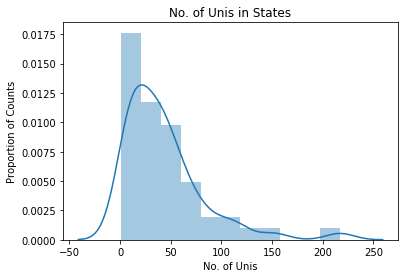

In [130]:
ax = sns.distplot(list(state_lens.values()))
ax.set(xlabel="No. of Unis", ylabel="Proportion of Counts", title="No. of Unis in States")
plt.show()

In [131]:
within_state_angles_rr

{'TX': 57.822,
 'MS': 57.314,
 'MA': 50.032,
 'CA': 57.275,
 'GA': 47.803,
 'NJ': 52.583,
 'MI': 53.005,
 'FL': 57.35,
 'AL': 45.528,
 'NM': 59.708,
 'MO': 57.876,
 'NC': 58.056,
 'NY': 52.419,
 'OH': 45.643,
 'IL': 55.694,
 'WA': 55.097,
 'MD': 56.383,
 'SC': 51.219,
 'MT': 39.943,
 'KY': 47.412,
 'IA': 50.269,
 'LA': 53.702,
 'UT': 46.599,
 'CO': 55.865,
 'HI': 49.987,
 'OK': 53.652,
 'WY': 38.64,
 'PA': 46.94,
 'IN': 41.875,
 'AZ': 58.265,
 'VA': 43.102,
 'VT': 40.688,
 'WI': 46.316,
 'ID': 47.59,
 'AR': 47.157,
 'DC': 35.947,
 'TN': 54.97,
 'OR': 46.508,
 'NV': 50.293,
 'MN': 47.194,
 'NH': 46.34,
 'KS': 44.466,
 'RI': 40.86,
 'ME': 36.816,
 'WV': 45.914,
 'AK': 15.618,
 'SD': 55.44,
 'NE': 45.986,
 'ND': 52.094,
 'CT': 42.125,
 'DE': 27.747,
 '': 0}

In [201]:
sorted_states_rr = sorted(within_state_angles_rr.items(), key=operator.itemgetter(1))


In [202]:
sorted_states_rr

[('', 0),
 ('AK', 15.618),
 ('DE', 27.747),
 ('DC', 35.947),
 ('ME', 36.816),
 ('WY', 38.64),
 ('MT', 39.943),
 ('VT', 40.688),
 ('RI', 40.86),
 ('IN', 41.875),
 ('CT', 42.125),
 ('VA', 43.102),
 ('KS', 44.466),
 ('AL', 45.528),
 ('OH', 45.643),
 ('WV', 45.914),
 ('NE', 45.986),
 ('WI', 46.316),
 ('NH', 46.34),
 ('OR', 46.508),
 ('UT', 46.599),
 ('PA', 46.94),
 ('AR', 47.157),
 ('MN', 47.194),
 ('KY', 47.412),
 ('ID', 47.59),
 ('GA', 47.803),
 ('HI', 49.987),
 ('MA', 50.032),
 ('IA', 50.269),
 ('NV', 50.293),
 ('SC', 51.219),
 ('ND', 52.094),
 ('NY', 52.419),
 ('NJ', 52.583),
 ('MI', 53.005),
 ('OK', 53.652),
 ('LA', 53.702),
 ('TN', 54.97),
 ('WA', 55.097),
 ('SD', 55.44),
 ('IL', 55.694),
 ('CO', 55.865),
 ('MD', 56.383),
 ('CA', 57.275),
 ('MS', 57.314),
 ('FL', 57.35),
 ('TX', 57.822),
 ('MO', 57.876),
 ('NC', 58.056),
 ('AZ', 58.265),
 ('NM', 59.708)]

In [134]:
np.corrcoef(np.array(list(within_state_angles_rr.values())), np.array(list(state_lens.values())))

array([[1.        , 0.39702842],
       [0.39702842, 1.        ]])

In [135]:
np.corrcoef(np.array(list(within_state_angles_tt.values())), np.array(list(state_lens.values())))

array([[1.        , 0.36875681],
       [0.36875681, 1.        ]])

In [136]:
within_state_angles_tt

{'TX': 45.577,
 'MS': 42.291,
 'MA': 56.062,
 'CA': 51.265,
 'GA': 52.553,
 'NJ': 47.559,
 'MI': 50.146,
 'FL': 47.205,
 'AL': 55.136,
 'NM': 45.542,
 'MO': 53.5,
 'NC': 56.162,
 'NY': 57.469,
 'OH': 51.885,
 'IL': 54.511,
 'WA': 51.228,
 'MD': 50.398,
 'SC': 53.125,
 'MT': 50.209,
 'KY': 56.06,
 'IA': 58.719,
 'LA': 52.479,
 'UT': 38.209,
 'CO': 50.33,
 'HI': 45.757,
 'OK': 50.864,
 'WY': 28.426,
 'PA': 56.196,
 'IN': 51.809,
 'AZ': 50.647,
 'VA': 52.236,
 'VT': 54.095,
 'WI': 53.242,
 'ID': 41.245,
 'AR': 54.57,
 'DC': 37.958,
 'TN': 51.682,
 'OR': 54.834,
 'NV': 24.318,
 'MN': 55.212,
 'NH': 50.923,
 'KS': 53.121,
 'RI': 47.355,
 'ME': 54.43,
 'WV': 49.651,
 'AK': 47.354,
 'SD': 41.061,
 'NE': 59.137,
 'ND': 51.32,
 'CT': 51.775,
 'DE': 41.15,
 '': 0}

In [137]:
for state_1 in states:
    for state_2 in states:
        if state_1 == state_2:
            continue
        between_state_angles_rr[(state_1, state_2)] = 0
        between_state_angles_tt[(state_1, state_2)] = 0
        no_checks_rr = 0
        no_checks_tt = 0
        for uni_1 in states[state_1]:
            
            teaching_vector_1, research_vector_1 = get_entity_vector(uni_1)

            for uni_2 in states[state_2]:
                
                teaching_vector_2, research_vector_2 = get_entity_vector(uni_2)
                
                if research_vector_1 is not None and research_vector_2 is not None:
                    between_state_angles_rr[(state_1, state_2)] += angle_between(research_vector_1, research_vector_2)[0]
                    no_checks_rr += 1

                if teaching_vector_1 is not None and teaching_vector_2 is not None:
                    between_state_angles_tt[(state_1, state_2)] += angle_between(teaching_vector_1, teaching_vector_2)[0]
                    no_checks_tt += 1                
        try:
            between_state_angles_rr[(state_1, state_2)] = round(between_state_angles_rr[(state_1, state_2)] / no_checks_rr, 3)
            between_state_angles_tt[(state_1, state_2)] = round(between_state_angles_tt[(state_1, state_2)] / no_checks_tt, 3)
        except ZeroDivisionError:
            continue

In [138]:
avg_angle_between_rr = 0
avg_angle_between_tt = 0

In [139]:
avg_between_tiers(between_state_angles_rr)

{'TX': 53.322,
 'MS': 54.544,
 'MA': 49.678,
 'CA': 52.955,
 'GA': 48.803,
 'NJ': 51.404,
 'MI': 51.185,
 'FL': 53.331,
 'AL': 48.045,
 'NM': 58.452,
 'MO': 53.982,
 'NC': 53.704,
 'NY': 50.529,
 'OH': 47.585,
 'IL': 52.291,
 'WA': 52.291,
 'MD': 53.246,
 'SC': 50.577,
 'MT': 47.962,
 'KY': 48.687,
 'IA': 50.291,
 'LA': 52.024,
 'UT': 49.087,
 'CO': 52.854,
 'HI': 51.371,
 'OK': 52.146,
 'WY': 51.984,
 'PA': 48.1,
 'IN': 46.347,
 'AZ': 55.849,
 'VA': 46.687,
 'VT': 46.928,
 'WI': 48.203,
 'ID': 50.991,
 'AR': 49.341,
 'DC': 44.936,
 'TN': 52.457,
 'OR': 48.58,
 'NV': 55.24,
 'MN': 48.692,
 'NH': 49.214,
 'KS': 48.016,
 'RI': 46.928,
 'ME': 45.735,
 'WV': 48.868,
 'AK': 41.465,
 'SD': 54.277,
 'NE': 49.163,
 'ND': 55.027,
 'CT': 47.222,
 'DE': 45.71,
 '': 0.0}

In [140]:
for pairs in between_state_angles_rr:
    avg_angle_between_rr += between_state_angles_rr[pairs]
    avg_angle_between_tt += between_state_angles_tt[pairs]

In [141]:
avg_angle_between_rr /= len(between_state_angles_rr)
avg_angle_between_tt /= len(between_state_angles_tt)

In [142]:
avg_angle_within_rr = 0
avg_angle_within_tt = 0

In [143]:
for state in within_state_angles_rr:
    avg_angle_within_rr += within_state_angles_rr[state]
    avg_angle_within_tt += within_state_angles_tt[state]

In [144]:
avg_angle_within_rr /= len(within_state_angles_rr) - 1
avg_angle_within_tt /= len(within_state_angles_tt) - 1

In [145]:
avg_angle_between_rr, avg_angle_between_tt, avg_angle_within_rr, avg_angle_within_tt

(50.31979034690799, 51.23743061840113, 48.37503921568627, 49.7644705882353)

### Spatial Unit City Analysis

In [146]:
reader = csv.reader(open("../saved_data_structures/city_unis.csv"))

In [147]:
cities = {}

In [148]:
for k,v in reader:
    cities[k] = eval(v)

In [149]:
within_city_angles_rr = {}
between_city_angles_rr = {}

within_city_angles_rt = {}
within_city_angles_rt_self = {}

within_city_angles_tt = {}
between_city_angles_tt = {}

In [150]:
missing_unis_research_cities = []
missing_unis_teaching_cities = []

In [151]:
for city in cities:
    
        
    if len(cities[city]) < 2:
        continue
    
    within_city_angles_rr[city] = 0
    within_city_angles_tt[city] = 0
    within_city_angles_rt[city] = 0
    within_city_angles_rt_self[city] = 0

    no_checks_rr = 0
    no_checks_tt = 0
    no_checks_rt = 0
    no_checks_self = 0

    
    for uni_1 in cities[city]:
        
        teaching_vector_1, research_vector_1 = get_entity_vector(uni_1)
        
        if teaching_vector_1 is not None and research_vector_1 is not None:
            within_city_angles_rt_self[city] += angle_between(research_vector_1, teaching_vector_1)[0]
            no_checks_self += 1
            
        if teaching_vector_1 is None and uni_1 not in missing_unis_teaching_states:
            missing_unis_teaching_cities.append(uni_1)
            
        if research_vector_1 is None and uni_1 not in missing_unis_research_states:
            missing_unis_research_citites.append(uni_1)
            
        for uni_2 in cities[city]:
            
            if uni_1 == uni_2:
                continue
            
            teaching_vector_2, research_vector_2 = get_entity_vector(uni_2)
            
            if research_vector_1 is not None and research_vector_2 is not None:
                within_city_angles_rr[city] += angle_between(research_vector_1, research_vector_2)[0]
                no_checks_rr += 1
            
            if teaching_vector_1 is not None and teaching_vector_2 is not None:
                within_city_angles_tt[city] += angle_between(teaching_vector_1, teaching_vector_2)[0]
                no_checks_tt += 1                
            
            if research_vector_1 is not None and research_vector_2 is not None and teaching_vector_1 is not None and teaching_vector_2 is not None:
                within_city_angles_rt[city] += angle_between(research_vector_1, teaching_vector_2)[0] + angle_between(teaching_vector_1, research_vector_2)[0]
                no_checks_rt += 2
    try:
        within_city_angles_rt_self[city] = round(within_city_angles_rt_self[city] / no_checks_self, 3)
    except ZeroDivisionError:
        pass
    try:
        within_city_angles_rr[city] = round(within_city_angles_rr[city] / no_checks_rr, 3)
    except ZeroDivisionError:
        pass
    try:
        within_city_angles_tt[city] = round(within_city_angles_tt[city] / no_checks_tt, 3)
    except ZeroDivisionError:
        pass
    try:
        within_city_angles_rt[city] = round(within_city_angles_rt[city] / no_checks_rt, 3)
    except ZeroDivisionError:
        pass

In [152]:
within_city_angles_rr['Chicago']

51.5

In [153]:
within_city_angles_rr['Houston']

59.379

In [154]:
between_city_angles_rr = {}
between_city_angles_tt = {}

In [155]:
for city_1 in cities:
    for city_2 in cities:
        if city_1 == city_2:
            continue
        between_city_angles_rr[(city_1, city_2)] = 0
        between_city_angles_tt[(city_1, city_2)] = 0
        no_checks_rr = 0
        no_checks_tt = 0
        for uni_1 in cities[city_1]:
            
            teaching_vector_1, research_vector_1 = get_entity_vector(uni_1)

            for uni_2 in cities[city_2]:
                
                teaching_vector_2, research_vector_2 = get_entity_vector(uni_2)
                
                if research_vector_1 is not None and research_vector_2 is not None:
                    between_city_angles_rr[(city_1, city_2)] += angle_between(research_vector_1, research_vector_2)[0]
                    no_checks_rr += 1

                if teaching_vector_1 is not None and teaching_vector_2 is not None:
                    between_city_angles_tt[(city_1, city_2)] += angle_between(teaching_vector_1, teaching_vector_2)[0]
                    no_checks_tt += 1                
        try:
            between_city_angles_rr[(city_1, city_2)] = round(between_city_angles_rr[(city_1, city_2)] / no_checks_rr, 3)
            between_city_angles_tt[(city_1, city_2)] = round(between_city_angles_tt[(city_1, city_2)] / no_checks_tt, 3)
        except ZeroDivisionError:
            continue

In [156]:
import seaborn as sns

In [157]:
within_city_angles_rr['Chicago']

51.5

In [158]:
avg_angle_between_rr = 0
avg_angle_between_tt = 0

In [159]:
for pairs in between_city_angles_rr:
    avg_angle_between_rr += between_city_angles_rr[pairs]
    avg_angle_between_tt += between_city_angles_tt[pairs]

In [160]:
avg_angle_between_rr /= len(between_city_angles_rr)
avg_angle_between_tt /= len(between_city_angles_tt)

In [161]:
avg_angle_within_rr = 0
avg_angle_within_tt = 0

In [162]:
for city in within_city_angles_rr:
    avg_angle_within_rr += within_city_angles_rr[city]
    avg_angle_within_tt += within_city_angles_tt[city]

In [163]:
avg_angle_within_rr /= len(within_city_angles_rr) - 1
avg_angle_within_tt /= len(within_city_angles_tt) - 1

In [164]:
avg_angle_between_rr, avg_angle_between_tt, avg_angle_within_rr, avg_angle_within_tt

(33.85338227309856, 67.05668553038848, 38.744530612244894, 52.10139650145772)

In [165]:
def analyse_cities(cities, rev=True):
    angles = list(cities.values())
    angles = list(filter((0).__ne__, angles))
    ax = sns.distplot(angles)
    ax.set(xlabel="Angles", ylabel="Proportion of Counts", title="Distribution of Angles")
    plt.show()
    sorted_vals = sorted(cities.items(), key=operator.itemgetter(1))
    if rev:
        sorted_vals.reverse()
        return sorted_vals
    else:
        return sorted_vals

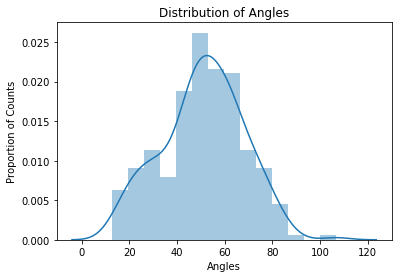

In [166]:
sorted_rr_cities = analyse_cities(within_city_angles_rr)

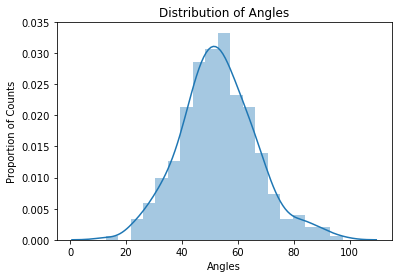

In [167]:
sorted_tt_cities = analyse_cities(within_city_angles_tt)

In [168]:
sorted_rr_cities

[('Dayton', 106.913),
 ('Orlando', 89.392),
 ('Long Island City', 84.193),
 ('Franklin', 83.544),
 ('El Paso', 83.455),
 ('Sumter', 83.306),
 ('Greensburg', 82.832),
 ('Little Rock', 81.266),
 ('Blacksburg', 80.922),
 ('Weatherford', 80.477),
 ('Ann Arbor', 78.05),
 ('Chattanooga', 77.892),
 ('Pensacola', 77.498),
 ('Ventura', 77.436),
 ('Aberdeen', 77.023),
 ('Lewiston', 76.84),
 ('Wilkes-Barre', 76.071),
 ('West Hartford', 75.621),
 ('Lincoln', 75.29),
 ('San Luis Obispo', 75.263),
 ('Asheville', 74.415),
 ('Fremont', 74.225),
 ('Lancaster', 74.091),
 ('Westminster', 73.57),
 ('Joliet', 73.315),
 ('Fort Lauderdale', 73.261),
 ('Adrian', 73.076),
 ('Moorhead', 72.656),
 ('Pasadena', 72.59),
 ('Rocklin', 71.573),
 ('Baton Rouge', 71.476),
 ('Long Beach', 71.005),
 ('Nampa', 70.786),
 ('Grand Rapids', 70.482),
 ('Flint', 70.424),
 ('Dallas', 70.216),
 ('Bakersfield', 69.56),
 ('Green Bay', 68.554),
 ('Lakewood', 68.294),
 ('Winter Park', 68.276),
 ('Odessa', 67.796),
 ('North Canton', 6

In [169]:
city_nums = {}
for city in cities:
    city_nums[city] = len(cities[city])
    if city_nums[city] > 15:
        print(city)

Chicago
New York
Boston


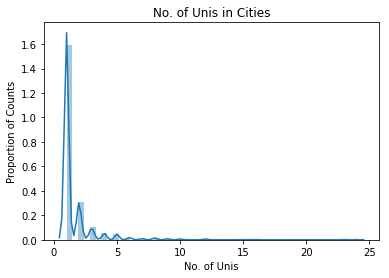

In [170]:
ax = sns.distplot(list(city_nums.values()))
ax.set(xlabel="No. of Unis", ylabel="Proportion of Counts", title="No. of Unis in Cities")
plt.show()

### Centre of Mass for USA and States

Calculate the centroid values for all of USA.

In [171]:
research_usa = []

In [172]:
for city in research_cities:
    research_usa.append(research_cities[city][0])

In [173]:
com_usa_research = np.mean(research_usa, axis=0)

In [174]:
job_usa = []

In [175]:
for city in job_cities:
    job_usa.append(job_cities[city][0])

In [176]:
com_usa_jobs = np.mean(job_usa, axis=0)

In [177]:
teaching_usa = []

In [178]:
for city in teaching_cities:
    teaching_usa.append(teaching_cities[city][0])

In [179]:
com_usa_teaching = np.mean(teaching_usa, axis=0)

In [180]:
research_diff_orgs = {}

In [181]:
for org in research_orgs:
    research_diff_orgs[org] = round(angle_between(com_usa_research, research_orgs[org][0])[0], 3)

In [182]:
sorted_diff_research_orgs = sorted(research_diff_orgs.items(), key=operator.itemgetter(1))

In [183]:
sorted_diff_research_orgs[:10]

[('Indiana State Univ', 4.683),
 ('Univ Washington', 4.808),
 ('Columbia Univ', 5.61),
 ('Univ Minnesota', 5.642),
 ('Univ S Florida', 5.672),
 ('George Washington Univ', 5.772),
 ('Univ Wisconsin Madison', 5.894),
 ('San Diego State Univ', 6.017),
 ('Florida Atlantic Univ', 6.177),
 ('Univ Alabama', 6.179)]

In [184]:
sorted_diff_research_orgs.reverse()

In [185]:
sorted_diff_research_orgs[:10]

[('Alcatel Lucent Bell Labs Murray Hill', 98.597),
 ('E2 Mayo Clin Jacksonville', 98.06),
 ('Off Med Director', 97.93),
 ('MGHIHP', 97.903),
 ('Oregon Med Grp', 97.639),
 ('Univ Illinois Med', 97.548),
 ('Cent Arkansas', 97.51),
 ('Duluth Community Clin Oncol Program', 97.291),
 ('HealthS Braintree Rehabil Hosp', 97.018),
 ('Zoonosis Control Branch', 96.873)]

In [186]:
teaching_diff_orgs = {}

In [187]:
for org in teaching_orgs:
    teaching_diff_orgs[org] = round(angle_between(com_usa_teaching, teaching_orgs[org][0])[0], 3)

In [188]:
sorted_diff_teaching_orgs = sorted(teaching_diff_orgs.items(), key=operator.itemgetter(1))

In [189]:
sorted_diff_teaching_orgs[:10]

[('Middle Tennessee State University', 12.62),
 ('California State University-Fullerton', 14.119),
 ('Rhode Island College', 14.178),
 ('University of Colorado Colorado Springs', 14.516),
 ('Houston Community College', 14.899),
 ('Cosumnes River College', 15.031),
 ('Eastern Connecticut State University', 15.304),
 ('University of Central Florida', 15.626),
 ('Northwest College', 15.637),
 ('The University of Tennessee-Martin', 15.796)]

In [190]:
sorted_diff_teaching_orgs.reverse()
sorted_diff_teaching_orgs[:10]

[('Houghton College', 90.3),
 ('University of Pittsburgh-Greensburg', 89.256),
 ('Stillman College', 88.371),
 ('Williams Baptist College', 87.963),
 ('Palmer College of Chiropractic', 87.497),
 ('Covenant Theological Seminary', 86.563),
 ('Nebraska Christian College', 85.819),
 ('Jewish Theological Seminary of America', 85.525),
 ('Trident University International', 85.186),
 ('Methodist Theological School in Ohio', 84.419)]

In [191]:
job_diff_cities = {}

In [192]:
for city in job_cities:
    job_diff_cities[city] = round(angle_between(com_usa_jobs, job_cities[city][0])[0], 3)

In [193]:
sorted_diff_job_cities = sorted(job_diff_cities.items(), key=operator.itemgetter(1))

In [194]:
sorted_diff_job_cities[:10]

[('Golden', 36.871),
 ('Houston', 37.079),
 ('Springfield', 37.78),
 ('Georgetown', 39.247),
 ('Orlando', 39.4),
 ('Canby', 41.226),
 ('Buckeye', 42.786),
 ('Portland', 43.227),
 ('Norfolk', 43.284),
 ('Chula Vista', 43.321)]

In [195]:
sorted_diff_job_cities.reverse()
sorted_diff_job_cities[:10]

[('Green Mountain Falls', 97.342),
 ('Morristown', 93.942),
 ('Savannah', 93.056),
 ('Forsyth', 92.626),
 ('Charlotte', 90.82),
 ('Imperial Beach', 90.755),
 ('Reidsville', 90.556),
 ('Grovetown', 90.077),
 ('Jersey City', 88.91),
 ('Wilmington', 87.016)]

### State wise angle comparisons

In [196]:
state_vectors_res, state_vectors_teach = {}, {}

In [197]:
for state in states:
    state_vectors_res[state] = []
    state_vectors_teach[state] = []
    for uni in states[state]:
        try:
            state_vectors_res[state].append(research_orgs[teaching_to_research_match[uni]][0])
        except KeyError:
            pass
        try:
            state_vectors_teach[state].append(teaching_orgs[uni][0])
        except KeyError:
            pass

In [198]:
for state in state_vectors_res:
    state_vectors_res[state] = np.mean(state_vectors_res[state], axis=0)
    state_vectors_teach[state] = np.mean(state_vectors_teach[state], axis=0)

/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/software/Anaconda3-5.3.0-el7-x86_64/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [211]:
state_angles_usa_res, state_angles_usa_teach = {}, {}

In [210]:
del state_vectors_res['']

In [212]:
for state in state_vectors_res:
    state_angles_usa_res[state] = round(angle_between(state_vectors_res[state], com_usa_research)[0], 3)
    state_angles_usa_teach[state] = round(angle_between(state_vectors_teach[state], com_usa_teaching)[0], 3)

In [213]:
state_angles_usa_res

{'TX': 13.061,
 'MS': 20.771,
 'MA': 10.981,
 'CA': 9.625,
 'GA': 13.186,
 'NJ': 16.373,
 'MI': 17.849,
 'FL': 13.808,
 'AL': 10.699,
 'NM': 21.309,
 'MO': 11.89,
 'NC': 9.127,
 'NY': 9.572,
 'OH': 8.043,
 'IL': 12.579,
 'WA': 12.665,
 'MD': 12.54,
 'SC': 14.737,
 'MT': 17.197,
 'KY': 8.532,
 'IA': 20.117,
 'LA': 15.336,
 'UT': 16.279,
 'CO': 13.266,
 'HI': 14.329,
 'OK': 14.451,
 'WY': 33.915,
 'PA': 8.54,
 'IN': 12.249,
 'AZ': 22.763,
 'VA': 11.739,
 'VT': 16.143,
 'WI': 12.652,
 'ID': 23.666,
 'AR': 19.28,
 'DC': 17.183,
 'TN': 12.904,
 'OR': 11.134,
 'NV': 30.293,
 'MN': 11.719,
 'NH': 16.76,
 'KS': 14.395,
 'RI': 16.533,
 'ME': 21.741,
 'WV': 10.978,
 'AK': 17.238,
 'SD': 19.549,
 'NE': 18.041,
 'ND': 24.15,
 'CT': 22.544,
 'DE': 25.295}

In [214]:
state_angles_usa_teach

{'TX': 12.145,
 'MS': 14.152,
 'MA': 8.816,
 'CA': 7.367,
 'GA': 11.536,
 'NJ': 9.835,
 'MI': 7.462,
 'FL': 8.032,
 'AL': 15.881,
 'NM': 17.33,
 'MO': 11.548,
 'NC': 16.001,
 'NY': 10.971,
 'OH': 6.851,
 'IL': 8.286,
 'WA': 14.168,
 'MD': 10.285,
 'SC': 13.389,
 'MT': 30.086,
 'KY': 18.606,
 'IA': 10.352,
 'LA': 13.442,
 'UT': 13.784,
 'CO': 14.72,
 'HI': 18.58,
 'OK': 8.514,
 'WY': 15.378,
 'PA': 13.132,
 'IN': 14.318,
 'AZ': 14.45,
 'VA': 7.079,
 'VT': 23.556,
 'WI': 12.204,
 'ID': 11.09,
 'AR': 9.473,
 'DC': 18.322,
 'TN': 9.052,
 'OR': 13.419,
 'NV': 9.848,
 'MN': 12.344,
 'NH': 13.84,
 'KS': 17.596,
 'RI': 17.241,
 'ME': 17.529,
 'WV': 12.131,
 'AK': 51.323,
 'SD': 15.138,
 'NE': 18.375,
 'ND': 19.064,
 'CT': 10.384,
 'DE': 18.784}

In [215]:
state_sorted_com_res = sorted(state_angles_usa_res.items(), key=operator.itemgetter(1))

In [216]:
state_sorted_com_teach = sorted(state_angles_usa_teach.items(), key=operator.itemgetter(1))

In [218]:
state_sorted_com_res

[('OH', 8.043),
 ('KY', 8.532),
 ('PA', 8.54),
 ('NC', 9.127),
 ('NY', 9.572),
 ('CA', 9.625),
 ('AL', 10.699),
 ('WV', 10.978),
 ('MA', 10.981),
 ('OR', 11.134),
 ('MN', 11.719),
 ('VA', 11.739),
 ('MO', 11.89),
 ('IN', 12.249),
 ('MD', 12.54),
 ('IL', 12.579),
 ('WI', 12.652),
 ('WA', 12.665),
 ('TN', 12.904),
 ('TX', 13.061),
 ('GA', 13.186),
 ('CO', 13.266),
 ('FL', 13.808),
 ('HI', 14.329),
 ('KS', 14.395),
 ('OK', 14.451),
 ('SC', 14.737),
 ('LA', 15.336),
 ('VT', 16.143),
 ('UT', 16.279),
 ('NJ', 16.373),
 ('RI', 16.533),
 ('NH', 16.76),
 ('DC', 17.183),
 ('MT', 17.197),
 ('AK', 17.238),
 ('MI', 17.849),
 ('NE', 18.041),
 ('AR', 19.28),
 ('SD', 19.549),
 ('IA', 20.117),
 ('MS', 20.771),
 ('NM', 21.309),
 ('ME', 21.741),
 ('CT', 22.544),
 ('AZ', 22.763),
 ('ID', 23.666),
 ('ND', 24.15),
 ('DE', 25.295),
 ('NV', 30.293),
 ('WY', 33.915)]

### Norm - Variance Vector Number Analysis

How does the variance norm vector and number of articles link to the research outputs?

In [ ]:
def sorted_total_articles_norm(vectors, no_papers=500, ascending=False):
    total_no_articles = {}
    norms = {}
    for entity in vectors:
        if vectors[entity][2] > no_papers:
            total_no_articles[entity] = vectors[entity][2]
            norms[entity] = np.linalg.norm(vectors[entity][1])
    sorted_total_papers = sorted(total_no_articles.items(), key=operator.itemgetter(1))
    sorted_norms = sorted(norms.items(), key=operator.itemgetter(1))
    if ascending:
        return sorted_total_papers, sorted_norms
    else:
        sorted_total_papers.reverse() 
        sorted_norms.reverse()
        return sorted_total_papers, sorted_norms, norms

In [ ]:
sorted_research_orgs_total_papers, sorted_research_orgs_norms, research_orgs_norms = sorted_total_articles_norm(research_orgs)

In [ ]:
sorted_research_orgs_total_papers[0:50]

In [ ]:
#for org in sorted_research_orgs_total_papers[0:50]:
#    uni, papers = org
#   print(uni, research_orgs_norms[uni])

In [ ]:
# sorted_research_orgs_norms[0:25]

In [ ]:
# sorted_research_orgs_norms[-25:]

### teaching-research analysis

How is what is being taught in universities related to what is being researched? Does this spill-over, spatially?

### teaching-job analysis

How is what is being taught at universities related to what jobs are being advertised? Does this spill-over, spatially?